### Gradient Descent

L5 exercise: use gradient descent to find linear regression model

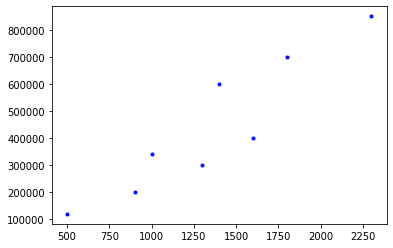

In [ ]:
data = [
        (5, 12),
        (9, 20),
        (10, 34),
        (13, 30),
        (14, 60),
        (16, 40),
        (18, 70),
        (23, 85)
]
data = [(point[0]*100, point[1]*10000 )for point in data]

import pandas as pd
data = pd.DataFrame(data, columns=['x', 'y'])
# data.plot(x='x', y='y', kind='scatter')
import matplotlib.pyplot as plt

plt.plot(data.iloc[:, 0], data.iloc[:, 1], 'b.')

### income_recreation data

In [ ]:
import numpy as np
data1 = np.array([
        [2400, 41200],
        [2650, 50100],
        [2350, 52000],
        [4950, 66000],
        [3100, 44500],
        [2500, 37700],
        [5106, 73500],
        [3100, 37500],
        [2900, 56700],
        [1750, 35600]
])
def feature_scaling(data):
  return np.array([(v - np.mean(data)) / (max(data) - min(data)) for v in data])
scalling_X1 = feature_scaling(data1[:, 0]).reshape(-1, 1)
scalling_y1 = feature_scaling(data1[:, 1]).reshape(-1, 1)

### process income_recreation data

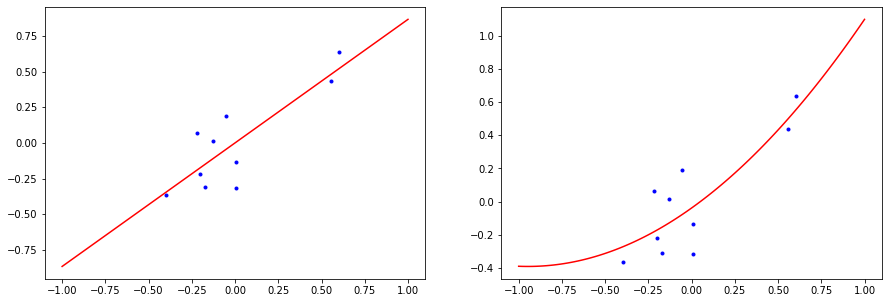

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.array([
        [2400, 41200],
        [2650, 50100],
        [2350, 52000],
        [4950, 66000],
        [3100, 44500],
        [2500, 37700],
        [5106, 73500],
        [3100, 37500],
        [2900, 56700],
        [1750, 35600]
])
def batch_gradient_descent(X, y, eta, limit):
  X.shape
  m = len(X)
  X_b = np.c_[np.ones((m, 1)), X]
  n = len(X_b[0])
  theta = np.zeros((n, 1))
  for i in range(limit):
    theta = theta - eta * (2/m) * X_b.T.dot(X_b.dot(theta) - y)
  return theta

X = data[:, 0]
X = np.array([(v - np.mean(X))/(np.max(X) - np.min(X)) for v in X]).reshape(-1, 1)
y = data[:, 1]
y = np.array([(v - np.mean(y))/(np.max(y) - np.min(y)) for v in y]).reshape(-1, 1)

cal_theta = batch_gradient_descent(X, y, 0.001, 100000)
X_new = np.array([-1, 1]).reshape(2, 1)
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_new = X_new_b.dot(cal_theta)

plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-')


XX = np.c_[X, X**2]
# print(XX)
quadratic_theta = batch_gradient_descent(XX, y, .001, 100000)
# XX_new_b = np.array([[1, -1, 1], [1, 1, 1]])
# yy_new_b = XX_new_b.dot(quardratic_theta)
XX_new = np.linspace(-1, 1, 100).reshape(100, 1)
XX_new_b = np.c_[np.ones((len(XX_new), 1)), XX_new, XX_new**2]
yy_quad = XX_new_b.dot(quadratic_theta)

plt.subplot(122)
plt.plot(X, y, 'b.')
plt.plot(XX_new, yy_quad, 'r')

### process income_recreation data using scikit-learn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(-2.0, 2.0, -2.0, 2.0)

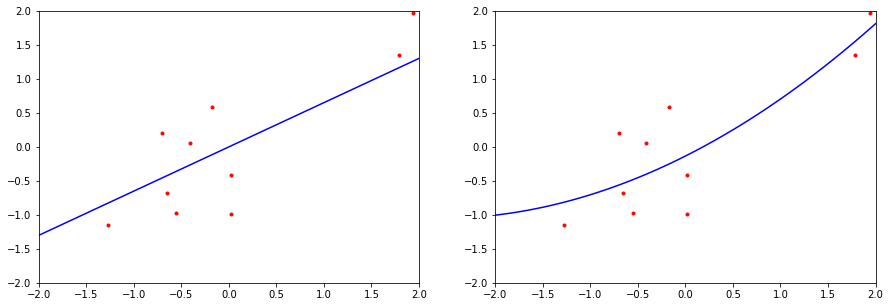

In [ ]:
# use scikit learn to do it one more time
data = np.array([
        [2400, 41200],
        [2650, 50100],
        [2350, 52000],
        [4950, 66000],
        [3100, 44500],
        [2500, 37700],
        [5106, 73500],
        [3100, 37500],
        [2900, 56700],
        [1750, 35600]
])

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

scaler = StandardScaler()
scalling_X = scaler.fit_transform(data[:, 0].reshape(-1, 1))
scalling_y = scaler.fit_transform(data[:, 1].reshape(-1, 1))

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=10000, tol=1e-3)
sgd.fit(scalling_X, scalling_y)
sgd.intercept_, sgd.coef_
theta = np.c_[sgd.intercept_, sgd.coef_].reshape(2, 1)

polynomial = PolynomialFeatures(1)

X_new = np.linspace(-2, 2, 100).reshape(100, 1)
X_new_b = polynomial.fit_transform(X_new)
# X_new_b = np.c_[np.ones((100, 1)), X_new]
y_new = X_new_b.dot(theta)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(scalling_X, scalling_y, 'r.')
plt.plot(X_new, y_new, 'b-')
plt.axis([-2, 2, -2, 2])
def plot_scatter(X, y):
  plt.plot(X, y, 'b.')


from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(2)

X_poly = poly_features.fit_transform(scalling_X)
# print(X_poly)
X_new_poly = poly_features.fit_transform(X_new)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, scalling_y)

y_poly = lin_reg.predict(X_new_poly)

plt.subplot(122)
plt.plot(scalling_X, scalling_y, 'r.')
plt.plot(X_new, y_poly, 'b-')
plt.axis([-2, 2, -2, 2])
 
# trans_y = scaler.fit_transform(y)